In [2]:
import numpy as np
class LogisticRegression:
    '''
    default: regularization term =1
    learning_rate: 0.001
    iteration_numbers: 10000
    '''
    def __init__(self, penalty = None, Lambda = 1, lrate = 0.001, epochs = 10000):
        self.W = None
        self.penalty = penalty
        self.Lambda = Lambda
        self.lrate= lrate
        self.epochs = epochs
        self.sigmoid = lambda x:1/(1+ np.exp(-x))
    def loss(self, x, y):
        m = x.shape[0]
        y_pred = self.sigmoid(x * self.W)
        return (-1/m) * np.sum((np.multiply(y, np.log(y_pred)) + np.multiply((1-y), np.log(1-y_pred))))
    def fit(self,x,y):
        lossList = []
        # calculate the number of data samples
        m = x.shape[0]
        X = np.concatenate((np.ones((m,1)), x),axis=1) # (100, 3)
        # calculate the number of features
        n = X.shape[1]
        # reshape the W into a matrix
        self.W = np.mat(np.ones((n,1)))

        XMat = np.mat(X)
        # reshape y as a (m x 1) matrix
        YMat = np.mat(y.reshape(-1,1))
        # for loop
        for i in range(self.epochs):
            h = self.sigmoid(XMat*self.W)
            gradient = XMat.T * (h - YMat)/m

            # add regularization terms
            if self.penalty == 'l2':
                gradient = gradient + self.Lambda * self.W
            elif self.penalty == 'l1':
                gradient = gradient + self.Lambda * np.sign(self.W)

            self.W = self.W - self.lrate * gradient
            if i % 50 == 0:
                lossList.append(self.loss(XMat, YMat))
        return self.W, lossList


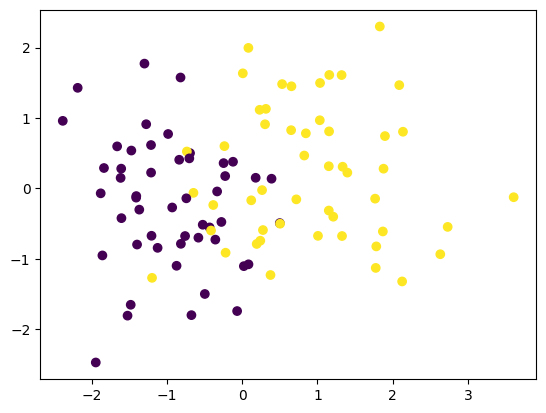

In [3]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)

plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [4]:
x.shape
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)

In [5]:
X.shape

(100, 3)

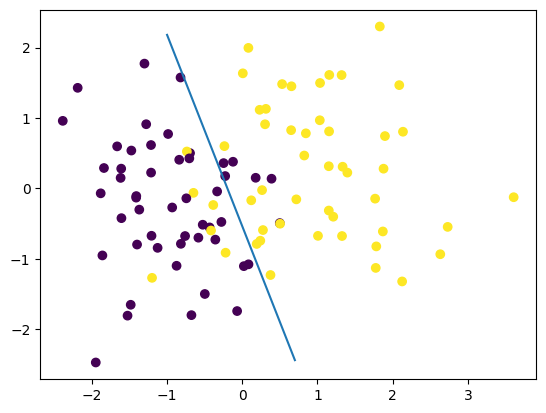

In [6]:
lr = LogisticRegression()
w,lossList = lr.fit(x,y)

#z=0 is the dividing line for linear classification
# w[0]+ x*w[1] + y* w[2]=0, calculate y 
x_test = [[-1],[0.7]]
y_test = (-w[0]-x_test*w[1])/w[2] 

plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,y_test)
plt.show()


### Plot the loss

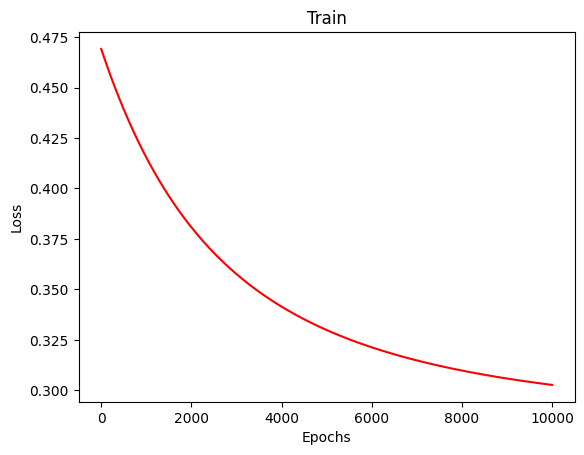

In [7]:
n = np.linspace(0,10000,200)
plt.plot(n,lossList,c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

However, this figure tells us the training didn't converge.

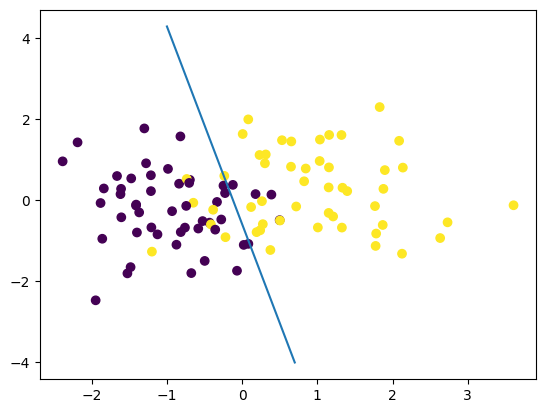

In [8]:
lr = LogisticRegression(epochs=50000)
w,lossList = lr.fit(x,y)

#前面讲过，z=0是线性分类临界线
# w[0]+ x*w[1] + y* w[2]=0,求解y (x,y其实就是x1,x2)
x_test = [[-1],[0.7]]
y_test = (-w[0]-x_test*w[1])/w[2] 

plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_test,y_test)
plt.show()

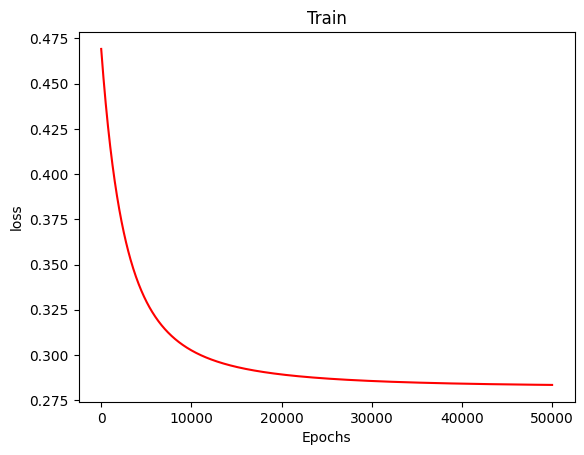

In [9]:
n = np.linspace(0, 50000, 1000)
plt.plot(n, lossList, c = 'r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [10]:
print('Model paramters:\n', w, '\n')
m = x.shape[0]
X = np.concatenate((np.ones((m,1)),x), axis=1)
XMat = np.mat(X)
y_pred = [1 if x >= 0.5 else 0 for x in lr.sigmoid(XMat*w)]
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))


Model paramters:
 [[0.32080482]
 [2.65375501]
 [0.54420912]] 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.92      0.88      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [11]:
from sklearn.linear_model import LogisticRegression as LR
clf = LR(penalty='none') #The default penalty is L2 reg，with C=1，Here C is the reciprocal of the regularization term

clf.fit(x,y)
print('Parameters generate by sklearn lib：\n','coefficients:',clf.coef_,'\n','intercept:',clf.intercept_)

y_pred_1 = clf.predict(x)
print('\n')
print(classification_report(y,y_pred_1))


Parameters generate by sklearn lib：
 coefficients: [[2.88547244 0.54858854]] 
 intercept: [0.37832436]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

- The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.



In [12]:
def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if   (predicted[i] == 0) & (actual[i] == 0):
            TP += 1
        elif (predicted[i] == 0) & (actual[i] == 1):
            FP += 1
        elif (predicted[i] == 1) & (actual[i] == 1):
            TN += 1
        else:
            FN += 1

    accuracy  = (TP + TN) / (TP + FP + TN + FN) 
    precision = (TP) / (TP + FP) 
    recall    = (TP) / (TP + FN) 
    f1_score  = (2 * precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

In [15]:
calculate_metrics(y_pred, y)

(0.9, 0.8846153846153846, 0.92, 0.9019607843137256)

## Comparisons
 * In our python version for logistic regression, larger lambda means the penalty is stronger
 * In sklearn, smaller values of C constrain the model more [link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html)

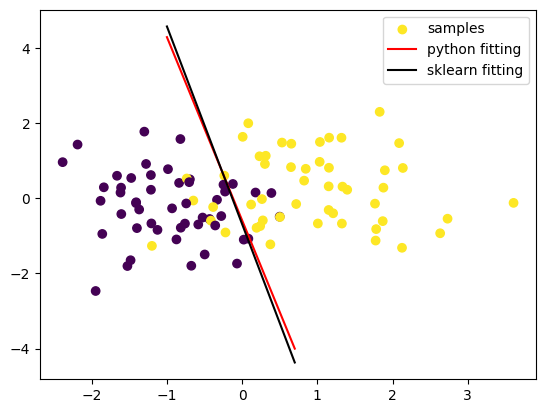

In [13]:
y_test_1 = (-clf.intercept_ - clf.coef_[0][0] * np.array(x_test))/clf.coef_[0][1]

fig =plt.figure()
ax1= fig.add_subplot()
ax1.scatter(x[:,0],x[:,1],c=y,label='samples')

ax1.plot(x_test,y_test,c='r',label='python fitting')
ax1.plot(x_test,y_test_1,c='k',label='sklearn fitting')
plt.legend()
plt.show()
